In [1]:
"""
make_swan_input_idalia

Code to make SWAN input requesting SPEC2D output for drifters during Hurricane Idalia

This notebook is based on the really nice example provided by Jacob Davis (davisjr@uw.edu)

Example code for loading and working with Spotter data from the NHCI
aggregated drifter dataset in Python .pickle format. Since all datasets
have the same variable names and structure, this example framework can
also be used for DWSD and microSWIFT drifters.

"""

import os
import pickle
from datetime import datetime, timezone

import matplotlib.pyplot as plt
import pandas as pd

DATA_DIRECTORY = '/vortexfs1/home/csherwood/proj/NOPP_Idalia/'
DATA_FILENAME = 'hurricane_idalia_drifter_data_v1.pickle'

In [2]:
with open(os.path.join(DATA_DIRECTORY, DATA_FILENAME), 'rb') as handle:
    drifters = pickle.load(handle)

# `drifters` is a python dictionary keyed by drifter type (spotter,
# dwsd, or microswift)
# `spotter` is a python dictionary of Pandas DataFrames, keyed by
# each drifter ID. The drifter ids can then be accessed as follows:
spotter = drifters['spotter']
spotter_ids = list(spotter.keys())
for id in spotter_ids:
    print(id)

dwsd = drifters['dwsd']
dwsd_ids = list(dwsd.keys())
for id in dwsd_ids:
    print(id)
    
mswift = drifters['microswift']
mswift_ids = list(mswift.keys())
for id in mswift_ids:
    print(id)

SPOT-30025D
SPOT-30052D
SPOT-30055D
SPOT-30061D
SPOT-30066D
SPOT-30095D
SPOT-30101D
SPOT-30102D
SPOT-30103D
SPOT-30164D
300534060649690
300534060941280
300534064703160
300534064703730
300534064800060
300534064800070
300534064800090
300534064800250
300534061518160
300534060949490
300534061518010
029
037
046
048


In [3]:
# Make nicknames for these drifters to conform with the max. 8 char limit in SWAN filesname
# after adding three characters for a counter (to differentiate the POINTS).
# This is a manual step but could be automated.
snames = ['S025D','S052D','S055D','S061D','S066D','S095D','S101D','S102D','S103D','S164D']
dnames = ['D9690','D1280','D3160', 'D3730','D0060','D0070','D0090','D0250','D8160','D9490','D8010']
mnames = ['M0029','M0037','M0046','M0048']

In [4]:
# Check to see if they are correct and check out latitudes
for i, id in enumerate( spotter_ids) :
    maxlat = spotter[id]['latitude'].max()
    print(id,snames[i], maxlat)
for i, id in enumerate( dwsd_ids) :
    maxlat = dwsd[id]['latitude'].max()
    print(id,dnames[i], maxlat)
for i, id in enumerate( mswift_ids) :
    maxlat = mswift[id]['latitude'].max()
    print(id,mnames[i], maxlat)

SPOT-30025D S025D 28.68153
SPOT-30052D S052D 29.45272
SPOT-30055D S055D 29.03298
SPOT-30061D S061D 28.1355333
SPOT-30066D S066D 28.2158167
SPOT-30095D S095D 29.50005
SPOT-30101D S101D 28.66552
SPOT-30102D S102D 29.2237
SPOT-30103D S103D 29.1431333
SPOT-30164D S164D 29.16865
300534060649690 D9690 24.4137594
300534060941280 D1280 24.6290572
300534064703160 D3160 24.4763976
300534064703730 D3730 24.6249148
300534064800060 D0060 28.1468332
300534064800070 D0070 28.6242082
300534064800090 D0090 28.9925352
300534064800250 D0250 29.3691349
300534061518160 D8160 29.9038304
300534060949490 D9490 30.4017255
300534061518010 D8010 29.2378842
029 M0029 28.146244049072266
037 M0037 27.548124313354492
046 M0046 28.950855255126953
048 M0048 28.79196548461914


In [5]:
# The data for a single id (e.g. the first) can be accessed as:
spotter_id = spotter_ids[0] # = 'SPOT-30068D'
spotter[spotter_id].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 222 entries, 2023-08-28 22:06:01+00:00 to 2023-08-31 23:47:55+00:00
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   latitude                 222 non-null    float64
 1   longitude                222 non-null    float64
 2   significant_height       74 non-null     float64
 3   peak_period              74 non-null     float64
 4   peak_direction           74 non-null     float64
 5   peak_directional_spread  74 non-null     float64
 6   mean_period              74 non-null     float64
 7   mean_direction           74 non-null     float64
 8   mean_directional_spread  74 non-null     float64
 9   frequency                74 non-null     object 
 10  energy_density           74 non-null     object 
 11  a1                       74 non-null     object 
 12  b1                       74 non-null     object 
 13  a2                       74 non

In [6]:
# check time
spotter[spotter_id]['longitude'].loc['2023-08-29 1200':'2023-08-30 1300']

time
2023-08-29 12:06:01+00:00   -83.214833
2023-08-29 12:26:01+00:00   -83.217083
2023-08-29 12:46:01+00:00   -83.219370
2023-08-29 13:06:01+00:00   -83.221900
2023-08-29 13:26:01+00:00   -83.224350
                               ...    
2023-08-30 11:26:01+00:00   -83.453017
2023-08-30 11:46:01+00:00   -83.444530
2023-08-30 12:06:01+00:00   -83.437333
2023-08-30 12:26:01+00:00   -83.430300
2023-08-30 12:46:01+00:00   -83.423700
Name: longitude, Length: 75, dtype: float64

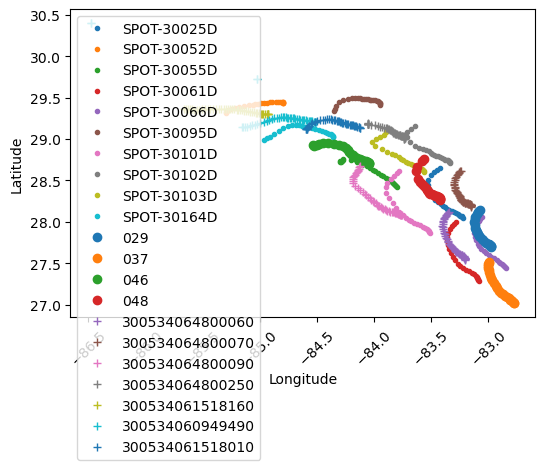

In [7]:
# example: plot lat, lon for positions with valid wave data
import numpy as np
fig, ax = plt.subplots(figsize=(6,4))
for spotter_id in spotter.keys():
    only_waves = spotter[spotter_id]['energy_density'].notnull()
    ax.plot(
        spotter[spotter_id][only_waves]['longitude'].loc['2023-08-29 1200':'2023-08-30 1300'],
        spotter[spotter_id][only_waves]['latitude'].loc['2023-08-29 1200':'2023-08-30 1300'],'.',
        label = spotter_id,
    )
for mswift_id in mswift.keys():
    ax.plot(
        mswift[mswift_id]['longitude'].loc['2023-08-29 1200':'2023-08-30 1300'],
        mswift[mswift_id]['latitude'].loc['2023-08-29 1200':'2023-08-30 1300'],'o',
        label = mswift_id,
    )
for dwsd_id in dwsd.keys():
    # some of these are too far south
    if dwsd[dwsd_id]['latitude'].max() > 25.:
        ax.plot(
            dwsd[dwsd_id]['longitude'].loc['2023-08-29 1200':'2023-08-30 1300'],
            dwsd[dwsd_id]['latitude'].loc['2023-08-29 1200':'2023-08-30 1300'],'+',
            label = dwsd_id,
        )
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.legend()
ax.tick_params(axis='x', rotation=45)

In [8]:
# Open a file text to be cut+pasted into SWAN input file for spotters
f = open(DATA_DIRECTORY+'idalia_spotter_spec2d.txt', 'w')
for nid, spotter_id in enumerate( spotter.keys() ):

    # Some rows have times with other data but no wave info (Spotters only)
    only_waves = spotter[spotter_id]['energy_density'].notnull()

    ipt = 0 # index must stay below 100 or file names will be too long
    for index, row in spotter[spotter_id][only_waves].loc['2023-08-29 1200':'2023-08-30 1300'].iterrows():
        #print(index, row['latitude'])
        spectime = index.strftime('%Y%m%d.%H%m')
        pname = "{}{:03d}".format(snames[nid], ipt)
        pline = ("POINTS '{}' {:.4f} {:.4f}".format(pname, row['longitude'], row['latitude'] )) 
        sline = "SPECOUT '{}' SPEC2D ABS '{}.spc2d' OUTPUT {} 1000 HR".format( pname, pname, spectime )
        # print(pline)
        # print(sline)
        f.write(pline+'\n')
        f.write(sline+'\n')
        ipt +=1
        if(ipt >= 100):
            print("Warning: SWAN output filename prefix exceeds 8 chars.")

f.close()

In [9]:
# Open a file text to be cut+pasted into SWAN input file for microswifts
f1 = open(DATA_DIRECTORY+'idalia_mswift_spec2d.txt', 'w')
for nid, mswift_id in enumerate (mswift.keys() ):
    ipt = 0 # index must stay below 100 or file names will be too long
    for index, row in mswift[mswift_id].loc['2023-08-29 1200':'2023-08-30 1300'].iterrows():
        #print(index, row['latitude'])
        pname = "{}{:03d}".format(mnames[nid], ipt)
        starttime = index.strftime('%Y%m%d.%H%m')
        pline = ("POINTS '{}' {:.4f} {:.4f}".format(pname, row['longitude'], row['latitude'] )) 
        sline = "SPECOUT '{}' SPEC2D ABS '{}.spc2d' OUTPUT {} 1000 HR".format( pname, pname, starttime )
        # print(pline)
        # print(sline)
        f1.write(pline+'\n')
        f1.write(sline+'\n')
        ipt +=1
        if(ipt >= 100):
            print("Warning: SWAN output filename prefix exceeds 8 chars.")
    
f1.close()

In [10]:
# Open a file text to be cut+pasted into SWAN input file for dwsd drifters
# These have ids that are too long, so make a shorter name for SWAN
f2 = open(DATA_DIRECTORY+'idalia_dwsd_spec2d.txt', 'w')
for nid, dwsd_id in enumerate( dwsd.keys() ):
    # some of these are too far south
    if dwsd[dwsd_id]['latitude'].max() > 25.:
        ipt = 0  # index must stay below 100 or file names will be too long
        for index, row in dwsd[dwsd_id].loc['2023-08-29 1200':'2023-08-30 1300'].iterrows():
            pname = "{}{:03d}".format(dnames[nid], ipt)
            starttime = index.strftime('%Y%m%d.%H%m')
            pline = ("POINTS '{}' {:.4f} {:.4f}".format(pname, row['longitude'], row['latitude'] )) 
            sline = "SPECOUT '{}' SPEC2D ABS '{}.spc2d' OUTPUT {} 1000 HR".format( pname, pname, starttime )
            # print(pline)
            # print(sline)
            f2.write(pline+'\n')
            f2.write(sline+'\n')
            ipt +=1
            if(ipt >= 1000):
                print("Warning: SWAN output filename prefix exceeds 8 chars.")
    
f2.close()